<a href="https://colab.research.google.com/github/GianBallesteros/Skyline-Math-200/blob/main/(2)_Final_Python_Notebook_Setup_by_Gian_Ballesteros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # 2 : Is there an association between using mobility-aid devices and personal earnings?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1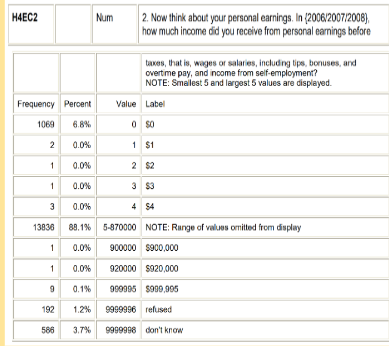

In [ ]:
#Manage data for variable 1

In [3]:
df['H4EC2'].dtype

dtype('O')

In [4]:
df['Earnings'] = df['H4EC2']
df['Earnings'].dtype

dtype('O')

In [5]:
df['Earnings'] = pd.to_numeric( df['Earnings'] , errors='coerce')
df['Earnings'].dtype

dtype('float64')

In [6]:
df['Earnings'].describe()

count    5.114000e+03
mean     5.572609e+05
std      2.221260e+06
min      0.000000e+00
25%      1.500000e+04
50%      3.000000e+04
75%      4.900000e+04
max      9.999998e+06
Name: Earnings, dtype: float64

In [7]:
df['Earnings'] = df['Earnings'].loc[ df['Earnings'] < 9999996]
df['Earnings'].max()

999995.0

In [8]:
df['Earnings'].mean()

35045.991539413946

In [9]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
#import researchPy
import researchpy as rp

In [11]:
rp.summary_cont( df['Earnings'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Earnings,4846.0,35045.9915,44694.8921,642.0461,33787.2899,36304.6931


In [12]:
rp.summarize(df['Earnings'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,Earnings,4846,35045.9915,30000.0,1997633377.1304,44694.8921,642.0461,"[33787.2899, 36304.6931]"


In [13]:
df['Earnings'].describe()

count      4846.000000
mean      35045.991539
std       44694.892070
min           0.000000
25%       15000.000000
50%       30000.000000
75%       45000.000000
max      999995.000000
Name: Earnings, dtype: float64

In [ ]:
#Graphs and tables or statistics

In [14]:
import seaborn as sns

<Axes: xlabel='Earnings', ylabel='Count'>

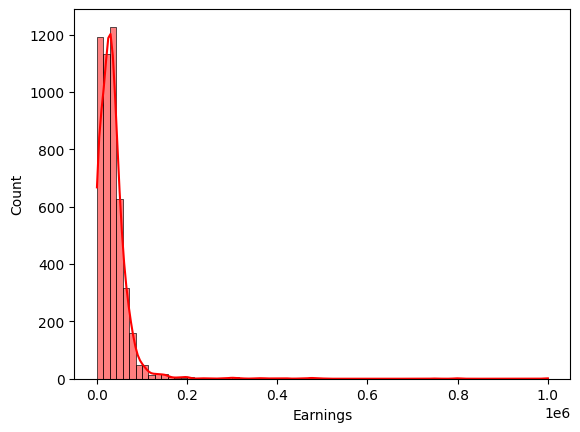

In [15]:
sns.histplot(x = 'Earnings', data = df, bins = 70, kde = True, color = "red")

<Axes: xlabel='Earnings'>

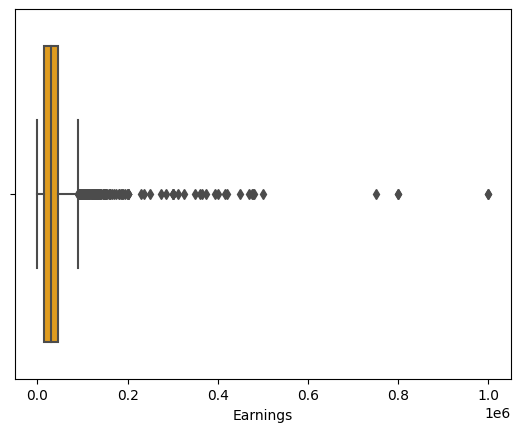

In [16]:
sns.boxplot( x = 'Earnings', data = df, color = "orange")

Codebook 2: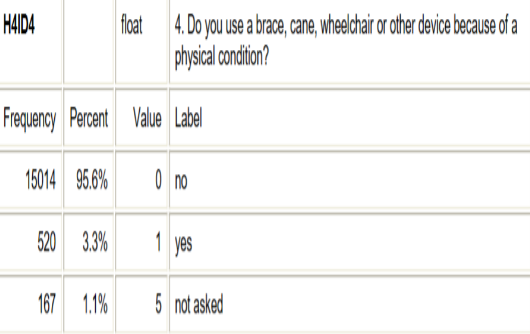

In [ ]:
#Manage data for variable 2

In [17]:
df['H4ID4'].value_counts()

0    4897
     1390
1     175
5      42
Name: H4ID4, dtype: int64

In [18]:
df['Mobility_aid_use'] = df['H4ID4']
df['Mobility_aid_use'].value_counts()

0    4897
     1390
1     175
5      42
Name: Mobility_aid_use, dtype: int64

In [19]:
df['Mobility_aid_use'] = df['Mobility_aid_use'].loc[ df['Mobility_aid_use'] !=' ']
df['Mobility_aid_use'] = df['Mobility_aid_use'].loc[ df['Mobility_aid_use'] !='5']

df['Mobility_aid_use'].value_counts()

0    4897
1     175
Name: Mobility_aid_use, dtype: int64

In [20]:
df['Mobility_aid_use'].replace(['0','1'] , ['NO','YES'] , inplace = True)
df['Mobility_aid_use'].value_counts()

NO     4897
YES     175
Name: Mobility_aid_use, dtype: int64

In [21]:
pip install researchPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#import researchPy
import researchpy as rp

In [23]:
rp.summary_cat(df['Mobility_aid_use'])

,Variable,Outcome,Count,Percent
0,Mobility_aid_use,NO,4897,96.55
1,,YES,175,3.45


In [ ]:
#Graphs and tables or statistics

In [26]:
import matplotlib.pyplot as plt

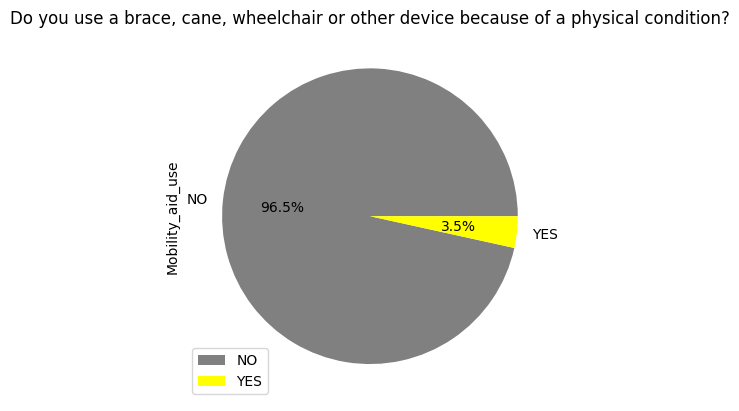

In [27]:
plt.title("Do you use a brace, cane, wheelchair or other device because of a physical condition?")
df['Mobility_aid_use'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=['gray', 'yellow'])
plt.legend(loc ="lower left")

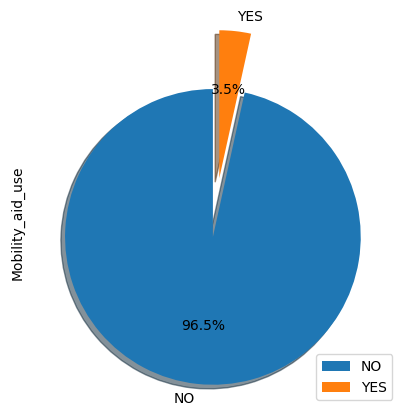

In [43]:
explode = (0.1, 0.3)
df['Mobility_aid_use'].value_counts().plot(kind ='pie', autopct='%1.1f%%',  explode=explode, shadow=True, startangle=90)
plt.legend(loc ="lower right")

<Axes: >

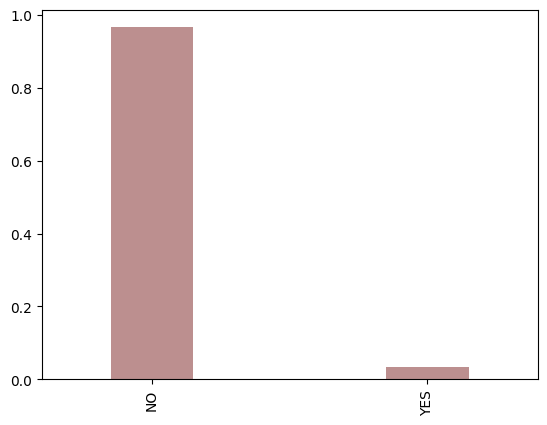

In [25]:
df['Mobility_aid_use'].value_counts(normalize = True).plot(kind ='bar', color = 'rosybrown', width = 0.3)